In [1]:
import os

import hydra
import mlflow
import numpy as np
import pandas as pd
import wandb
from ydata_profiling import ProfileReport

In [2]:
os.environ["WANDB_NOTEBOOK_NAME"] = "EDA.ipynb"

In [3]:
run = wandb.init(project= "nyc_airbnb", group= "development", job_type= "EDA notebooks", save_code= True)
file_path = wandb.use_artifact(artifact_or_name= "sample.csv:latest").file()
df = pd.read_csv(file_path)

wandb: Currently logged in as: rahulchandra1918 (rc2508). Use `wandb login --relogin` to force relogin


In [4]:
profile = ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Checking the outliers in price variable
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
df.head()

id                                               name    host_id  \
0   9138664                Private Lg Room 15 min to Manhattan   47594947   
1  31444015  TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...    8523790   
2   8741020  Voted #1 Location Quintessential 1BR W Village...   45854238   
3  34602077  Spacious 1 bedroom apartment 15min from Manhattan  261055465   
4  23203149   Big beautiful bedroom in huge Bushwick apartment     143460   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0      Iris              Queens       Sunnyside  40.74271  -73.92493   
1    Johlex           Manhattan  Hell's Kitchen  40.76682  -73.98878   
2      John           Manhattan    West Village  40.73631  -74.00611   
3     Regan              Queens         Astoria  40.76424  -73.92351   
4     Megan            Brooklyn        Bushwick  40.69839  -73.92044   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     74               2                  6  2019-05-26   
1  Entire home/apt    170               3                  0         NaN   
2  Entire home/apt    245               3                 51  2018-09-19   
3  Entire home/apt    125               3                  1  2019-05-24   
4     Private room     65               2                  8  2019-06-23   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.13                               1                 5  
1                NaN                               1               188  
2               1.12                               1                 0  
3               0.65                               1                13  
4               0.52                               2                 8

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [10]:
# Checking for missing values
df.isnull().sum()

id                                   0
name                                 7
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4123
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
dtype: int64

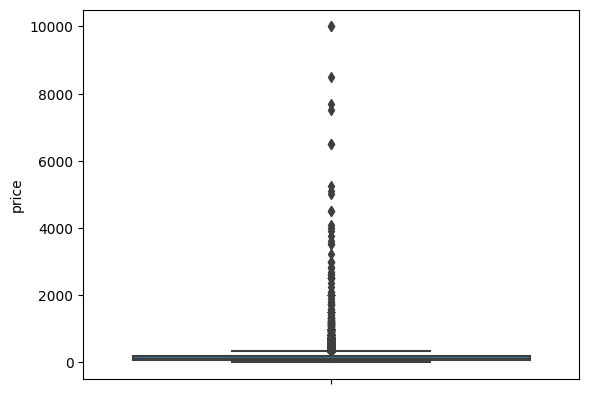

In [11]:
sns.boxplot(data= df, y= "price")
plt.show()

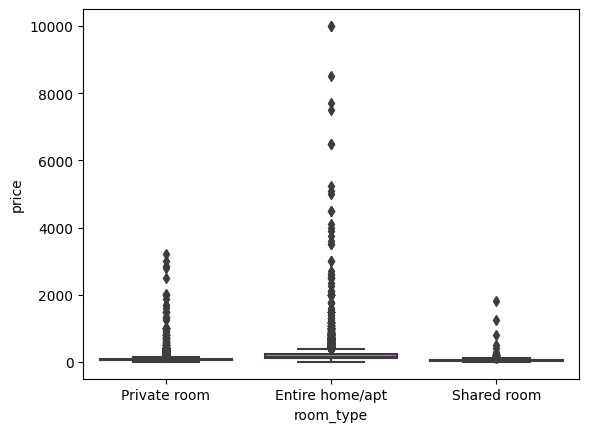

In [12]:
sns.boxplot(data= df, x= "room_type", y= "price")
plt.show()

In [13]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

In [15]:
run.finish()